In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

# Import modules
import os 
import scipy.io
from scipy import stats
from __future__ import print_function
import pandas as pd

import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
import pandas as pd

## Load Data from .mat files

In [2]:
test=scipy.io.loadmat('idp_connectome_aparc_length.mat')
aparcl=np.array(test['connectome_aparc_length'])
print(aparcl.shape)

test=scipy.io.loadmat('idp_connectome_aparc_count.mat')
aparcc=np.array(test['connectome_aparc_count'])
print(aparcc.shape)

test=scipy.io.loadmat('idp_connectome_aparc2009_length.mat')
aparc2l=np.array(test['connectome_aparc2009_length'])
print(aparc2l.shape)

test=scipy.io.loadmat('idp_connectome_aparc2009_count.mat')
aparc2c=np.array(test['connectome_aparc2009_count'])
print(aparc2c.shape)


(84, 84, 211)
(84, 84, 211)
(164, 164, 211)
(164, 164, 211)


## Zeropad smaller data, reorganize shape

In [3]:
zeromatal=np.zeros([164,164,211])
zeromatac=np.zeros([164,164,211])

zeromatal[40:124,40:124,:]=aparcl
zeromatac[40:124,40:124,:]=aparcc

aparcl=zeromatal
aparcc=zeromatac

X=np.zeros([164,164,211,4])
X[:,:,:,0]=aparcl
X[:,:,:,1]=aparcc
X[:,:,:,2]=aparc2l
X[:,:,:,3]=aparc2c

X=X.transpose([2,0,1,3])
print(X.shape)

(211, 164, 164, 4)


## remove subjs without connectome data

In [4]:
datasubjid=pd.read_csv('idp_data_1_mor.csv',header=0)
datasubjid=np.array(datasubjid)
datasubjid=datasubjid[:,0]
print(datasubjid.shape)
matsubjid=pd.read_csv('idp_connectome_subjectlist.csv',header=0)
matsubjid=np.array(matsubjid)
print(matsubjid.shape)

filtindex=np.isin(matsubjid,datasubjid)
filtindex=filtindex.ravel()

X=X[filtindex,:,:,:]
print(X.shape)


(208,)
(211, 1)
(208, 164, 164, 4)


## load labels, index data for all 6 types

In [5]:
# Load the labels for each type

data=pd.read_csv('idp_data_1_mor.csv',header=0)
data=np.array(data)

ad_smi=data[:,5]
mci_smi=data[:,6]
ad_mci=data[:,7]

adonly_smi=data[:,8]
adonly_mci=data[:,9]
adonly_adwithsmallvv=data[:,10]

# load the morphometry 
#data=pd.read_csv('idp_data_1_mor.csv',header=0)
#data=np.array(data)
#print(data.shape)
#mask=np.ones([959])
#mask[0:3]=0
#mask[5:11]=0
#mask=mask>=1

#morphdata=data[:,mask]
#print(morphdata.shape)
# remove columns 0 1 2 5 6 7 8 9 10
# Q? V, W

#ind_num=np.isnan(morphdata)
#test=ind_num*1
#result=np.sum(test,axis=0)
#nanmask=result<1
#morphdata=morphdata[:,nanmask]

test=scipy.io.loadmat('IDP_morph_100.mat')
morphdata=np.array(test['M2_new'])

# create X, y, Xvar for each type

ind_num=np.isnan(ad_smi)
y_adsmi=ad_smi[~ind_num]
X_adsmi=X[~ind_num,:,:,:]
Xvar_adsmi=morphdata[~ind_num,:]

ind_num=np.isnan(mci_smi)
y_mcismi=mci_smi[~ind_num]
X_mcismi=X[~ind_num,:,:,:]
Xvar_mcismi=morphdata[~ind_num,:]

ind_num=np.isnan(ad_mci)
y_admci=ad_mci[~ind_num]
X_admci=X[~ind_num,:,:,:]
Xvar_admci=morphdata[~ind_num,:]


# not really used
#ind_num=np.isnan(adonly_smi)
#y_adonlysmi=adonly_smi[~ind_num]
#X_adonlysmi=X[~ind_num,:,:,:]
#Xvar_adonly_smi=morphdata[~ind_num,:]

#ind_num=np.isnan(adonly_mci)
#y_adonlymci=adonly_mci[~ind_num]
#X_adonlymci=X[~ind_num,:,:,:]
#Xvar_adonlymci=morphdata[~ind_num,:]

#ind_num=np.isnan(adonly_adwithsmallvv)
#y_adonlyadwithsmallvv=adonly_adwithsmallvv[~ind_num]
#X_adonlyadwithsmallvv=X[~ind_num,:,:,:]
#Xvar_adonlyadwithsmallvv=morphdata[~ind_num,:]


## Run CNN with 5fold Cross validation for AD_SMI

TRAIN: (116,) TEST: (30,)
(116, 100)
(30, 100)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 11
epoch 1 
Best validation accuracy! iteration:11 accuracy: 100.0%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
Traning ends. The best valid accuracy is 100.0. Model named cnn_1522243664.


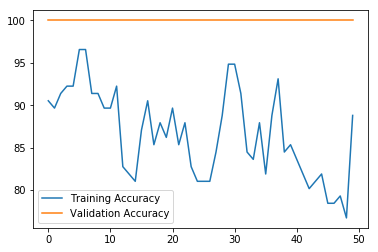

TRAIN: (117,) TEST: (29,)
(117, 100)
(29, 100)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 11
epoch 1 
Best validation accuracy! iteration:11 accuracy: 93.10344827586206%
epoch 2 
Best validation accuracy! iteration:22 accuracy: 96.55172413793103%
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
Traning ends. The best valid accuracy is 96.55172413793103. Model named cnn_1522243735.


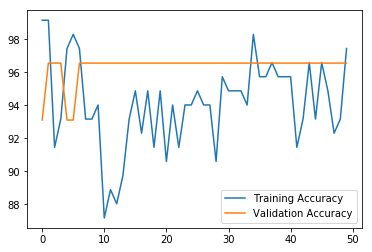

TRAIN: (117,) TEST: (29,)
(117, 100)
(29, 100)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 11
epoch 1 
Best validation accuracy! iteration:11 accuracy: 100.0%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
Traning ends. The best valid accuracy is 100.0. Model named cnn_1522243809.


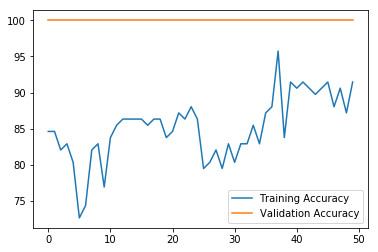

TRAIN: (117,) TEST: (29,)
(117, 100)
(29, 100)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 11
epoch 1 
Best validation accuracy! iteration:11 accuracy: 93.10344827586206%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
Best validation accuracy! iteration:396 accuracy: 96.55172413793103%
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
Traning ends. The best valid accuracy is 96.55172413793103. Model named cnn_1522243881.


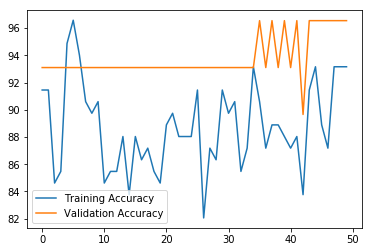

TRAIN: (117,) TEST: (29,)
(117, 100)
(29, 100)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 11
epoch 1 
Best validation accuracy! iteration:11 accuracy: 100.0%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
Traning ends. The best valid accuracy is 100.0. Model named cnn_1522243953.


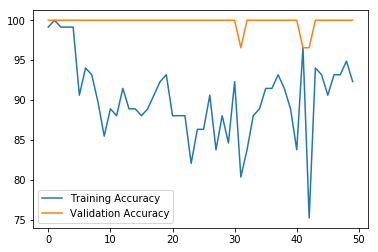

TRAIN: (116,) TEST: (30,)
(116, 100)
(30, 100)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 11
epoch 1 
Best validation accuracy! iteration:11 accuracy: 100.0%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
Traning ends. The best valid accuracy is 100.0. Model named cnn_1522244026.


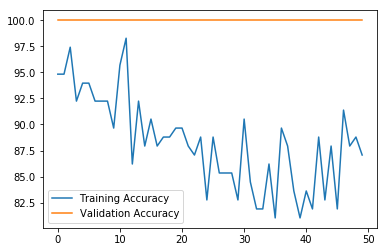

TRAIN: (117,) TEST: (29,)
(117, 100)
(29, 100)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 11
epoch 1 
Best validation accuracy! iteration:11 accuracy: 100.0%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
Traning ends. The best valid accuracy is 100.0. Model named cnn_1522244100.


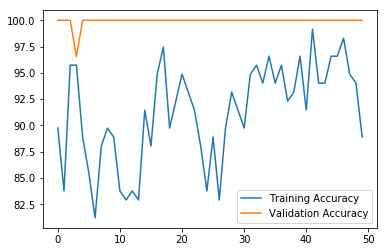

TRAIN: (117,) TEST: (29,)
(117, 100)
(29, 100)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 11
epoch 1 
Best validation accuracy! iteration:11 accuracy: 96.55172413793103%
epoch 2 
Best validation accuracy! iteration:22 accuracy: 100.0%
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
Traning ends. The best valid accuracy is 100.0. Model named cnn_1522244174.


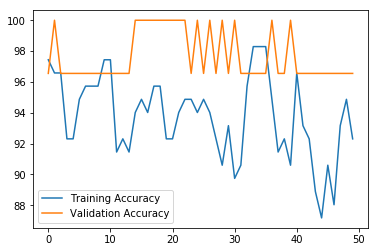

TRAIN: (117,) TEST: (29,)
(117, 100)
(29, 100)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 11
epoch 1 
Best validation accuracy! iteration:11 accuracy: 100.0%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
Traning ends. The best valid accuracy is 100.0. Model named cnn_1522244249.


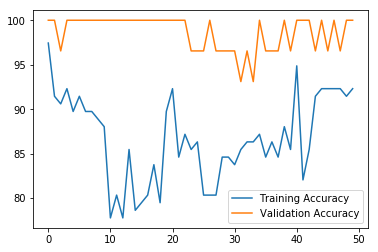

TRAIN: (117,) TEST: (29,)
(117, 100)
(29, 100)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 11
epoch 1 
Best validation accuracy! iteration:11 accuracy: 100.0%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
Traning ends. The best valid accuracy is 100.0. Model named cnn_1522244318.


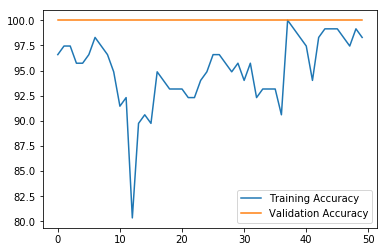

TRAIN: (116,) TEST: (30,)
(116, 100)
(30, 100)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 11
epoch 1 
Best validation accuracy! iteration:11 accuracy: 100.0%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
Traning ends. The best valid accuracy is 100.0. Model named cnn_1522244393.


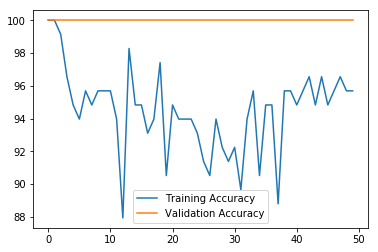

TRAIN: (117,) TEST: (29,)
(117, 100)
(29, 100)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 11
epoch 1 
Best validation accuracy! iteration:11 accuracy: 96.55172413793103%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
Best validation accuracy! iteration:154 accuracy: 100.0%
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
Traning ends. The best valid accuracy is 100.0. Model named cnn_1522244467.


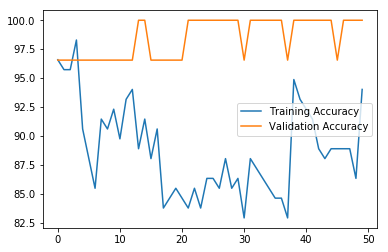

TRAIN: (117,) TEST: (29,)
(117, 100)
(29, 100)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 11
epoch 1 
Best validation accuracy! iteration:11 accuracy: 96.55172413793103%
epoch 2 
epoch 3 
Best validation accuracy! iteration:33 accuracy: 100.0%
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
Traning ends. The best valid accuracy is 100.0. Model named cnn_1522244541.


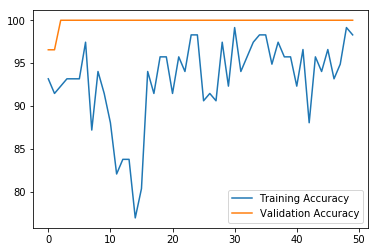

TRAIN: (117,) TEST: (29,)
(117, 100)
(29, 100)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 11
epoch 1 
Best validation accuracy! iteration:11 accuracy: 96.55172413793103%
epoch 2 
Best validation accuracy! iteration:22 accuracy: 100.0%
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
Traning ends. The best valid accuracy is 100.0. Model named cnn_1522244614.


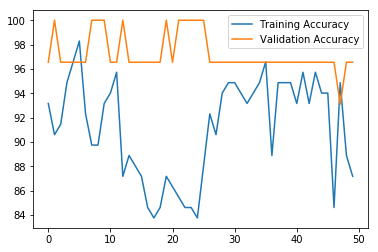

TRAIN: (117,) TEST: (29,)
(117, 100)
(29, 100)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 11
epoch 1 
Best validation accuracy! iteration:11 accuracy: 100.0%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
Traning ends. The best valid accuracy is 100.0. Model named cnn_1522244687.


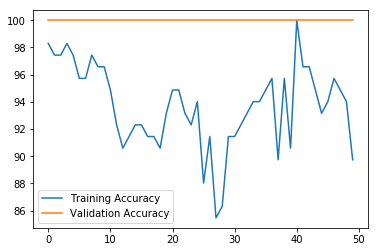

TRAIN: (116,) TEST: (30,)
(116, 100)
(30, 100)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 11
epoch 1 
Best validation accuracy! iteration:11 accuracy: 100.0%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
Traning ends. The best valid accuracy is 100.0. Model named cnn_1522244760.


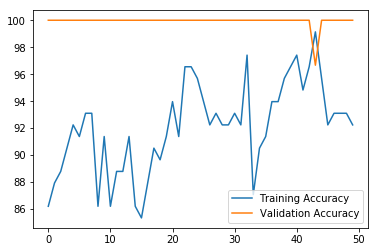

TRAIN: (117,) TEST: (29,)
(117, 100)
(29, 100)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 11
epoch 1 
Best validation accuracy! iteration:11 accuracy: 100.0%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
Traning ends. The best valid accuracy is 100.0. Model named cnn_1522244831.


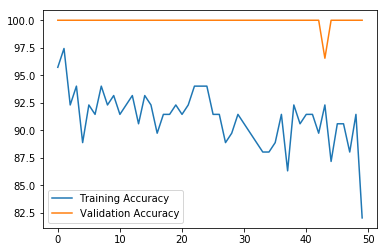

TRAIN: (117,) TEST: (29,)
(117, 100)
(29, 100)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 11
epoch 1 
Best validation accuracy! iteration:11 accuracy: 100.0%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
Traning ends. The best valid accuracy is 100.0. Model named cnn_1522244904.


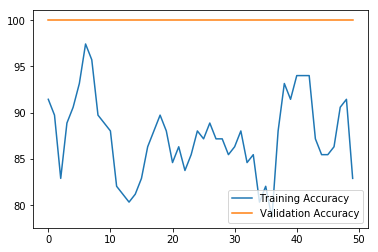

TRAIN: (117,) TEST: (29,)
(117, 100)
(29, 100)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 11
epoch 1 
Best validation accuracy! iteration:11 accuracy: 93.10344827586206%
epoch 2 
epoch 3 
epoch 4 
Best validation accuracy! iteration:44 accuracy: 96.55172413793103%
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
Best validation accuracy! iteration:352 accuracy: 100.0%
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
Traning ends. The best valid accuracy is 100.0. Model named cnn_1522244972.


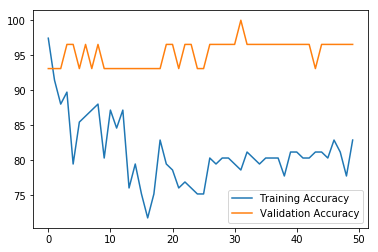

TRAIN: (117,) TEST: (29,)
(117, 100)
(29, 100)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 11
epoch 1 
Best validation accuracy! iteration:11 accuracy: 96.55172413793103%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
Traning ends. The best valid accuracy is 96.55172413793103. Model named cnn_1522245051.


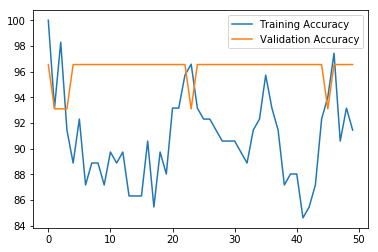

TRAIN: (116,) TEST: (30,)
(116, 100)
(30, 100)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 11
epoch 1 
Best validation accuracy! iteration:11 accuracy: 93.33333333333333%
epoch 2 
Best validation accuracy! iteration:22 accuracy: 96.66666666666667%
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
Best validation accuracy! iteration:308 accuracy: 100.0%
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
Traning ends. The best valid accuracy is 100.0. Model named cnn_1522245123.


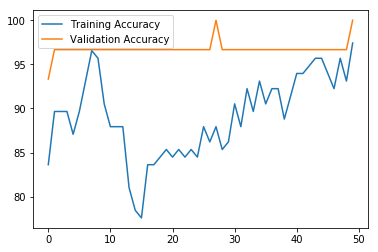

TRAIN: (117,) TEST: (29,)
(117, 100)
(29, 100)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 11
epoch 1 
Best validation accuracy! iteration:11 accuracy: 100.0%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
Traning ends. The best valid accuracy is 100.0. Model named cnn_1522245199.


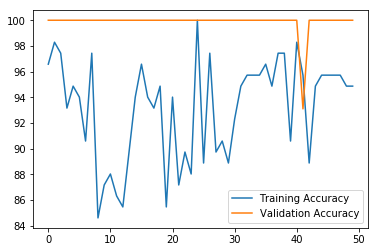

TRAIN: (117,) TEST: (29,)
(117, 100)
(29, 100)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 11
epoch 1 
Best validation accuracy! iteration:11 accuracy: 100.0%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
Traning ends. The best valid accuracy is 100.0. Model named cnn_1522245270.


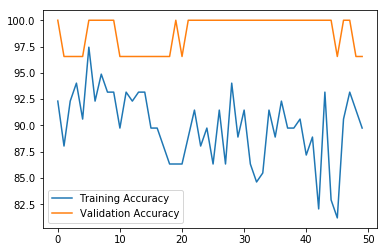

TRAIN: (117,) TEST: (29,)
(117, 100)
(29, 100)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 11
epoch 1 
Best validation accuracy! iteration:11 accuracy: 100.0%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
Traning ends. The best valid accuracy is 100.0. Model named cnn_1522245344.


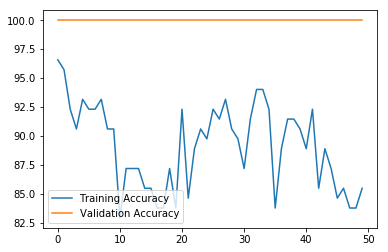

TRAIN: (117,) TEST: (29,)
(117, 100)
(29, 100)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 11
epoch 1 
Best validation accuracy! iteration:11 accuracy: 100.0%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epoch 45 
epoch 46 
epoch 47 
epoch 48 
epoch 49 
epoch 50 
Traning ends. The best valid accuracy is 100.0. Model named cnn_1522245417.


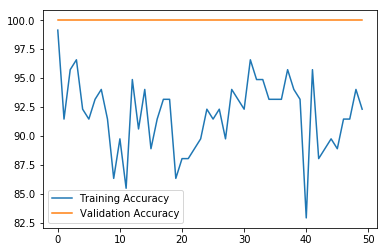

AD_SMI average accuracy is:  99.58620689655172
AD_SMI average standard deviation is:  1.1205570213290987


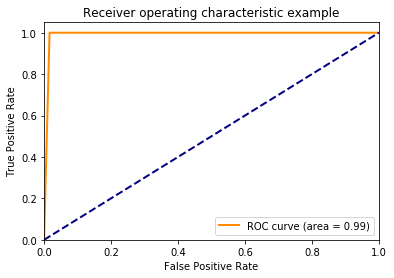

In [12]:
from sklearn.model_selection import RepeatedStratifiedKFold
from CNN_codes.CNN_with_addvariables import cnnm_training
from sklearn.metrics import roc_curve, auc

rskf=RepeatedStratifiedKFold(n_splits=5,n_repeats=5)
store_acc=[]
prediction=[]
truelabel=[]
for train_index,test_index in rskf.split(X_adsmi,y_adsmi):
    print("TRAIN:",train_index.shape,"TEST:",test_index.shape)
    # should augment data post split, think of incorporating the data augmention here
    X_train,X_test=X_adsmi[train_index],X_adsmi[test_index]
    y_train,y_test=y_adsmi[train_index],y_adsmi[test_index]
    X_trainvar,X_valvar=Xvar_adsmi[train_index],Xvar_adsmi[test_index]
    print(X_trainvar.shape)
    print(X_valvar.shape)
    
    tf.reset_default_graph()
    record_acc,recordtrainacc,recordvalacc,roc_pred,roc_truelabel=cnnm_training(X_train,y_train,X_trainvar,X_test,y_test,X_valvar,fc_units=[3000,1000,2], 
                 conv_featmap=[6,8,10],l2_norm=0.01,seed=235,
                 learning_rate=1e-3,epoch=50,batch_size=10,imglen=164,addedvar_num=100)
    #record_acc,recordtrainacc,recordvalacc=cnn_training(X_train,y_train,X_test,y_test,fc_units=[500,200,2], 
    #             conv_featmap=[6,10,20],l2_norm=0.01,seed=235,
    #             learning_rate=1e-3,epoch=20,batch_size=10,imglen=164)
    store_acc.append(record_acc)
    prediction.extend(roc_pred)
    truelabel.extend(roc_truelabel)
    plt.plot(recordtrainacc,label='Training Accuracy')
    plt.plot(recordvalacc,label="Validation Accuracy")
    plt.legend()
    plt.show()

mean_acc=np.mean(np.array(store_acc))
mean_std=np.std(store_acc)

print('AD_SMI average accuracy is: ',mean_acc)
print('AD_SMI average standard deviation is: ',mean_std)
    
fpr,tpr,_=roc_curve(prediction,truelabel)
roc_auc=auc(fpr,tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.savefig('/Users/choyale/Desktop/Deep Learning Project/Figures/IDP_ADSMI_ROC_curve_CNNM.jpg')
plt.show()

## Runn CNN with 5fold CV for MCI_SMI

C:\Users\choyale\AppData\Local\Continuum\miniconda3\envs\tfpls\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


curses is not supported on this machine (please install/reinstall curses for an optimal experience)
TRAIN: [ 0  1  2  3  5  7  8  9 10 11 15 17 18 19 20 21 22 23 24 25 26 27 28 29
 30 31 32 33 34 35 36 37 38 40 42 43 44 45 46 47 50 52 53 54 55 56 57 58
 59 60 61 62 63 64 65 66 68 69 70 71 72 74 75 76 77 78 79 80 82 86 87 88
 89 90 92 96 97] TEST: [ 4  6 12 13 14 16 39 41 48 49 51 67 73 81 83 84 85 91 93 94 95]
Number of training points:  (77,)
Number of testing points:  (21,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 7
epoch 1 
Best validation accuracy! iteration:7 accuracy: 71.42857142857143%
epoch 2 
Best validation accuracy! iteration:14 accuracy: 80.95238095238095%
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
Best validation accuracy! iteration:77 accuracy: 85.71428571428571%
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoc

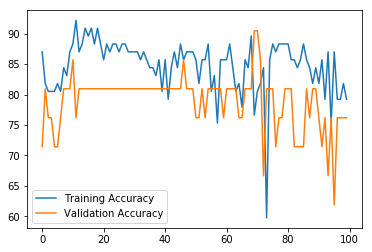

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 12 13 14 15 16 17 19 21 23 24 25 26 27
 28 29 30 33 34 35 36 38 39 40 41 42 43 44 46 47 48 49 50 51 53 55 56 58
 59 60 63 64 65 67 68 69 70 72 73 74 75 76 78 81 82 83 84 85 86 88 89 90
 91 92 93 94 95 96] TEST: [11 18 20 22 31 32 37 45 52 54 57 61 62 66 71 77 79 80 87 97]
Number of training points:  (78,)
Number of testing points:  (20,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 7
epoch 1 
Best validation accuracy! iteration:7 accuracy: 80.0%
epoch 2 
Best validation accuracy! iteration:14 accuracy: 85.0%
epoch 3 
Best validation accuracy! iteration:21 accuracy: 90.0%
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
Best validation accuracy! iteration:175 accuracy: 95.0%
epoch 26 
epoch 27 
epoch 2

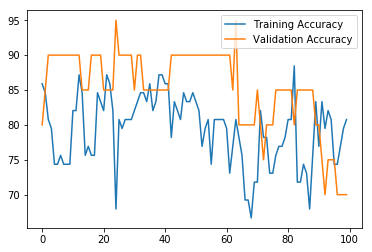

TRAIN: [ 1  2  3  4  5  6  7  8 11 12 13 14 15 16 17 18 19 20 21 22 24 25 28 29
 30 31 32 34 36 37 38 39 40 41 43 45 46 47 48 49 50 51 52 54 55 57 58 61
 62 64 65 66 67 68 69 70 71 72 73 74 75 77 78 79 80 81 83 84 85 86 87 88
 91 92 93 94 95 96 97] TEST: [ 0  9 10 23 26 27 33 35 42 44 53 56 59 60 63 76 82 89 90]
Number of training points:  (79,)
Number of testing points:  (19,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 7
epoch 1 
Best validation accuracy! iteration:7 accuracy: 89.47368421052632%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 


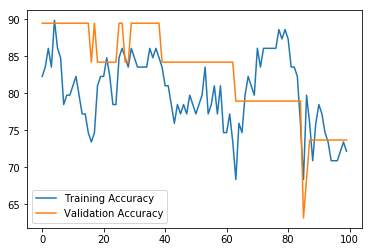

TRAIN: [ 0  1  2  3  4  5  6  8  9 10 11 12 13 14 15 16 18 19 20 21 22 23 24 26
 27 28 29 30 31 32 33 35 36 37 38 39 41 42 44 45 47 48 49 51 52 53 54 55
 56 57 59 60 61 62 63 66 67 71 73 76 77 79 80 81 82 83 84 85 87 88 89 90
 91 92 93 94 95 96 97] TEST: [ 7 17 25 34 40 43 46 50 58 64 65 68 69 70 72 74 75 78 86]
Number of training points:  (79,)
Number of testing points:  (19,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 7
epoch 1 
Best validation accuracy! iteration:7 accuracy: 89.47368421052632%
epoch 2 
epoch 3 
Best validation accuracy! iteration:21 accuracy: 94.73684210526315%
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
ep

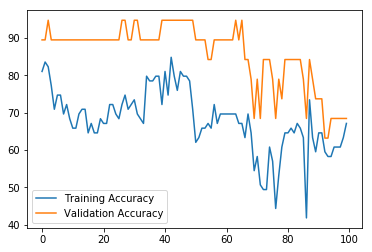

TRAIN: [ 0  4  6  7  9 10 11 12 13 14 16 17 18 20 22 23 25 26 27 31 32 33 34 35
 37 39 40 41 42 43 44 45 46 48 49 50 51 52 53 54 56 57 58 59 60 61 62 63
 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87
 89 90 91 93 94 95 97] TEST: [ 1  2  3  5  8 15 19 21 24 28 29 30 36 38 47 55 88 92 96]
Number of training points:  (79,)
Number of testing points:  (19,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 7
epoch 1 
Best validation accuracy! iteration:7 accuracy: 89.47368421052632%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 


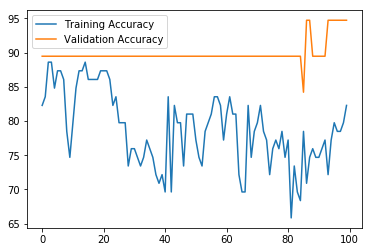

TRAIN: [ 0  1  2  3  5  6  7  8  9 11 12 15 16 17 19 20 21 22 23 24 26 27 28 30
 31 32 33 34 36 38 40 41 43 45 46 48 49 50 52 53 54 55 56 57 58 59 60 61
 62 63 64 65 66 67 68 69 72 73 74 75 78 79 80 82 83 85 86 87 88 89 90 91
 93 94 95 96 97] TEST: [ 4 10 13 14 18 25 29 35 37 39 42 44 47 51 70 71 76 77 81 84 92]
Number of training points:  (77,)
Number of testing points:  (21,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 7
epoch 1 
Best validation accuracy! iteration:7 accuracy: 80.95238095238095%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 


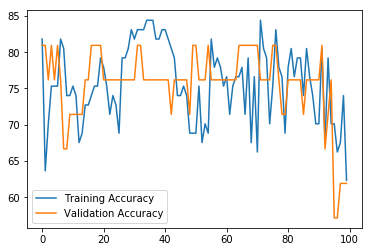

TRAIN: [ 0  1  2  3  4  5  7  8  9 10 11 12 13 14 15 16 18 20 21 23 24 25 26 27
 28 29 30 32 33 35 37 38 39 41 42 43 44 45 47 49 51 52 54 55 56 59 60 61
 62 63 64 65 66 67 69 70 71 72 73 74 75 76 77 78 80 81 82 84 85 86 87 89
 92 93 94 95 96 97] TEST: [ 6 17 19 22 31 34 36 40 46 48 50 53 57 58 68 79 83 88 90 91]
Number of training points:  (78,)
Number of testing points:  (20,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 7
epoch 1 
Best validation accuracy! iteration:7 accuracy: 85.0%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epo

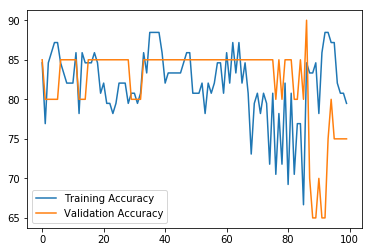

TRAIN: [ 1  2  4  5  6  9 10 11 12 13 14 15 16 17 18 19 21 22 23 24 25 26 27 28
 29 30 31 32 34 35 36 37 38 39 40 42 44 45 46 47 48 50 51 52 53 57 58 59
 61 63 64 66 67 68 69 70 71 72 75 76 77 78 79 80 81 82 83 84 86 87 88 89
 90 91 92 93 95 96 97] TEST: [ 0  3  7  8 20 33 41 43 49 54 55 56 60 62 65 73 74 85 94]
Number of training points:  (79,)
Number of testing points:  (19,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 7
epoch 1 
Best validation accuracy! iteration:7 accuracy: 89.47368421052632%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
Best validation accuracy! iteration:70 accuracy: 94.73684210526315%
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
ep

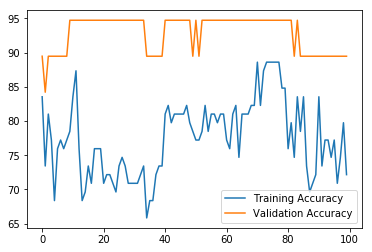

TRAIN: [ 0  3  4  5  6  7  8 10 13 14 17 18 19 20 22 23 24 25 26 27 28 29 30 31
 32 33 34 35 36 37 38 39 40 41 42 43 44 46 47 48 49 50 51 52 53 54 55 56
 57 58 59 60 61 62 63 65 67 68 70 71 72 73 74 75 76 77 79 80 81 82 83 84
 85 88 90 91 92 93 94] TEST: [ 1  2  9 11 12 15 16 21 45 64 66 69 78 86 87 89 95 96 97]
Number of training points:  (79,)
Number of testing points:  (19,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 7
epoch 1 
Best validation accuracy! iteration:7 accuracy: 78.94736842105263%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 


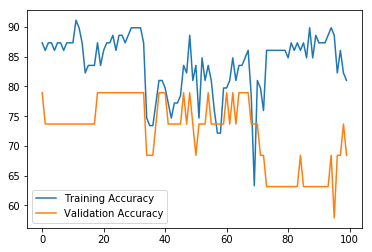

TRAIN: [ 0  1  2  3  4  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 25 29
 31 33 34 35 36 37 39 40 41 42 43 44 45 46 47 48 49 50 51 53 54 55 56 57
 58 60 62 64 65 66 68 69 70 71 73 74 76 77 78 79 81 83 84 85 86 87 88 89
 90 91 92 94 95 96 97] TEST: [ 5 23 24 26 27 28 30 32 38 52 59 61 63 67 72 75 80 82 93]
Number of training points:  (79,)
Number of testing points:  (19,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 7
epoch 1 
Best validation accuracy! iteration:7 accuracy: 84.21052631578948%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
Best validation accuracy! iteration:56 accuracy: 89.47368421052632%
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
ep

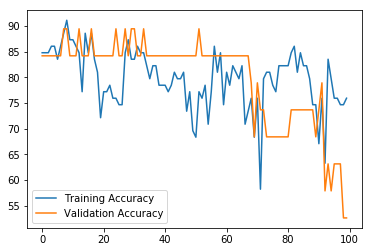

TRAIN: [ 1  2  3  4  5  6  8 10 11 12 13 14 15 16 17 18 19 20 22 23 24 25 26 27
 28 30 31 32 33 34 35 36 37 39 40 41 42 43 44 45 46 49 50 52 53 54 56 57
 58 59 60 61 62 63 64 66 67 68 70 71 72 74 77 78 79 80 83 84 85 86 87 88
 89 91 93 94 96] TEST: [ 0  7  9 21 29 38 47 48 51 55 65 69 73 75 76 81 82 90 92 95 97]
Number of training points:  (77,)
Number of testing points:  (21,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 7
epoch 1 
Best validation accuracy! iteration:7 accuracy: 85.71428571428571%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 


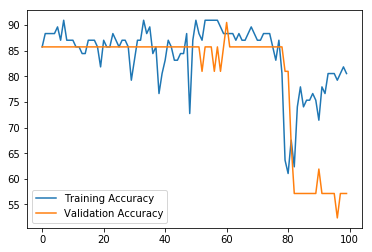

TRAIN: [ 0  1  2  3  5  6  7  8  9 13 15 16 17 19 20 21 22 23 24 25 26 27 29 30
 31 34 36 38 39 40 42 43 44 46 47 48 49 50 51 53 55 56 57 58 59 60 61 63
 64 65 66 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 89 90
 91 92 93 95 96 97] TEST: [ 4 10 11 12 14 18 28 32 33 35 37 41 45 52 54 62 67 68 88 94]
Number of training points:  (78,)
Number of testing points:  (20,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 7
epoch 1 
Best validation accuracy! iteration:7 accuracy: 90.0%
epoch 2 
epoch 3 
Best validation accuracy! iteration:21 accuracy: 95.0%
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39

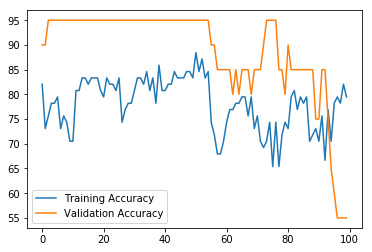

TRAIN: [ 0  3  4  7  9 10 11 12 14 15 18 20 21 22 23 24 26 27 28 29 30 31 32 33
 35 37 38 39 40 41 42 43 44 45 47 48 49 50 51 52 54 55 56 57 58 59 60 61
 62 64 65 67 68 69 70 71 72 73 74 75 76 77 79 80 81 82 83 84 86 87 88 89
 90 92 93 94 95 96 97] TEST: [ 1  2  5  6  8 13 16 17 19 25 34 36 46 53 63 66 78 85 91]
Number of training points:  (79,)
Number of testing points:  (19,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 7
epoch 1 
Best validation accuracy! iteration:7 accuracy: 84.21052631578948%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
Best validation accuracy! iteration:49 accuracy: 89.47368421052632%
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
ep

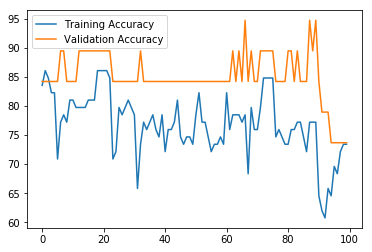

TRAIN: [ 0  1  2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 21 23 25 26 28
 29 30 31 32 33 34 35 36 37 38 41 44 45 46 47 48 49 50 51 52 53 54 55 57
 58 59 61 62 63 65 66 67 68 69 71 73 75 76 77 78 81 82 83 85 86 87 88 89
 90 91 92 93 94 95 97] TEST: [ 3 20 22 24 27 39 40 42 43 56 60 64 70 72 74 79 80 84 96]
Number of training points:  (79,)
Number of testing points:  (19,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 7
epoch 1 
Best validation accuracy! iteration:7 accuracy: 78.94736842105263%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
Best validation accuracy! iteration:42 accuracy: 84.21052631578948%
epoch 7 
epoch 8 
epoch 9 
epoch 10 
Best validation accuracy! iteration:70 accuracy: 89.47368421052632%
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoc

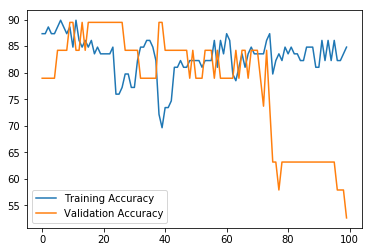

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21 22 24 25
 27 28 29 32 33 34 35 36 37 38 39 40 41 42 43 45 46 47 48 51 52 53 54 55
 56 60 62 63 64 65 66 67 68 69 70 72 73 74 75 76 78 79 80 81 82 84 85 88
 90 91 92 94 95 96 97] TEST: [15 23 26 30 31 44 49 50 57 58 59 61 71 77 83 86 87 89 93]
Number of training points:  (79,)
Number of testing points:  (19,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 7
epoch 1 
Best validation accuracy! iteration:7 accuracy: 78.94736842105263%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 


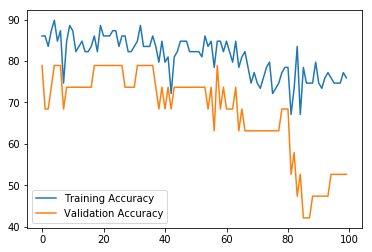

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 13 14 15 16 17 18 19 20 22 24 26 28
 30 31 33 36 37 38 39 41 42 43 44 46 47 48 49 51 52 53 54 55 56 57 58 60
 62 63 64 65 66 67 68 71 73 74 75 76 77 78 79 80 81 82 83 84 85 87 88 89
 92 93 94 96 97] TEST: [12 21 23 25 27 29 32 34 35 40 45 50 59 61 69 70 72 86 90 91 95]
Number of training points:  (77,)
Number of testing points:  (21,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 7
epoch 1 
Best validation accuracy! iteration:7 accuracy: 80.95238095238095%
epoch 2 
Best validation accuracy! iteration:14 accuracy: 85.71428571428571%
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
Best validation accuracy! iteration:49 accuracy: 90.47619047619048%
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoc

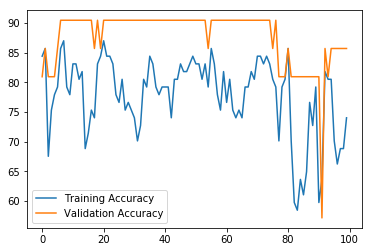

TRAIN: [ 1  2  3  4  5  7 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 27 28 29
 31 32 33 34 35 36 37 38 39 40 42 44 45 47 48 49 50 51 52 53 54 56 58 59
 60 61 63 64 66 67 68 69 70 71 72 73 78 79 80 82 83 84 85 86 87 88 89 90
 91 92 93 95 96 97] TEST: [ 0  6  8  9 10 26 30 41 43 46 55 57 62 65 74 75 76 77 81 94]
Number of training points:  (78,)
Number of testing points:  (20,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 7
epoch 1 
Best validation accuracy! iteration:7 accuracy: 90.0%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 
epoch 44 
epo

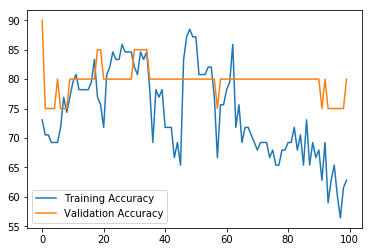

TRAIN: [ 0  1  2  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21 23 25 26 27 28
 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 48 50 52 54 55 57
 58 59 61 62 63 64 65 67 68 69 70 72 73 74 75 76 77 79 81 82 83 85 86 87
 88 90 91 92 94 95 97] TEST: [ 3  4 15 22 24 47 49 51 53 56 60 66 71 78 80 84 89 93 96]
Number of training points:  (79,)
Number of testing points:  (19,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 7
epoch 1 
Best validation accuracy! iteration:7 accuracy: 73.6842105263158%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
Best validation accuracy! iteration:91 accuracy: 78.94736842105263%
epoch 14 
epoch 15 
epoch 16 
epoch 17 
Best validation accuracy! iteration:119 accuracy: 84.21052631578948%
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoc

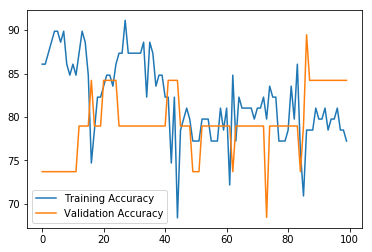

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 15 16 20 21 22 23 24 25 26 27 29
 30 32 33 34 35 36 37 39 40 41 43 44 45 46 47 49 50 51 53 54 55 56 57 59
 60 61 62 64 65 66 68 69 70 71 72 73 74 75 76 77 78 79 80 81 83 84 86 89
 90 91 92 93 94 95 96] TEST: [13 14 17 18 19 28 31 38 42 48 52 58 63 67 82 85 87 88 97]
Number of training points:  (79,)
Number of testing points:  (19,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 7
epoch 1 
Best validation accuracy! iteration:7 accuracy: 84.21052631578948%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 


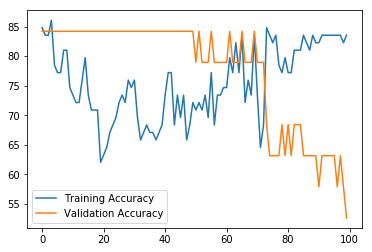

TRAIN: [ 0  3  4  6  8  9 10 12 13 14 15 17 18 19 21 22 23 24 25 26 27 28 29 30
 31 32 34 35 38 40 41 42 43 45 46 47 48 49 50 51 52 53 55 56 57 58 59 60
 61 62 63 65 66 67 69 70 71 72 74 75 76 77 78 80 81 82 84 85 86 87 88 89
 90 91 93 94 95 96 97] TEST: [ 1  2  5  7 11 16 20 33 36 37 39 44 54 64 68 73 79 83 92]
Number of training points:  (79,)
Number of testing points:  (19,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 7
epoch 1 
Best validation accuracy! iteration:7 accuracy: 84.21052631578948%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
Best validation accuracy! iteration:84 accuracy: 89.47368421052632%
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
ep

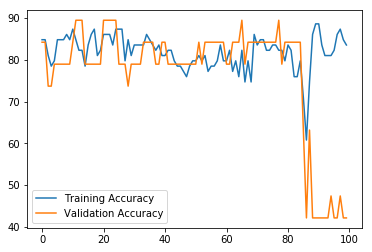

TRAIN: [ 0  1  2  3  4  5  7  9 10 11 12 13 14 15 17 18 19 20 21 22 23 24 25 26
 28 29 30 31 32 33 34 35 36 37 40 41 42 45 46 47 48 49 51 52 53 55 57 58
 59 60 61 62 63 65 66 67 68 69 70 72 73 74 76 77 79 80 81 82 83 85 86 87
 89 90 95 96 97] TEST: [ 6  8 16 27 38 39 43 44 50 54 56 64 71 75 78 84 88 91 92 93 94]
Number of training points:  (77,)
Number of testing points:  (21,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 7
epoch 1 
Best validation accuracy! iteration:7 accuracy: 80.95238095238095%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 39 
epoch 40 
epoch 41 
epoch 42 
epoch 43 


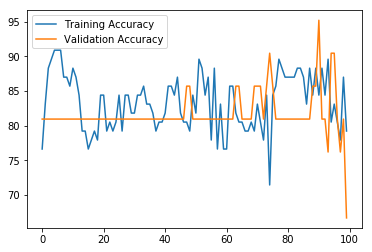

TRAIN: [ 2  3  4  6  7  8  9 11 12 15 16 18 19 20 21 22 23 24 25 26 27 29 30 32
 33 34 35 36 37 38 39 40 41 42 43 44 46 49 50 51 52 53 54 55 56 57 58 59
 62 63 64 65 67 68 69 70 71 72 75 77 78 79 80 81 82 84 85 86 87 88 89 90
 91 92 93 94 96 97] TEST: [ 0  1  5 10 13 14 17 28 31 45 47 48 60 61 66 73 74 76 83 95]
Number of training points:  (78,)
Number of testing points:  (20,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 7
epoch 1 
Best validation accuracy! iteration:7 accuracy: 90.0%
epoch 2 
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
Best validation accuracy! iteration:196 accuracy: 95.0%
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epoch 37 
epoch 38 
epoch 3

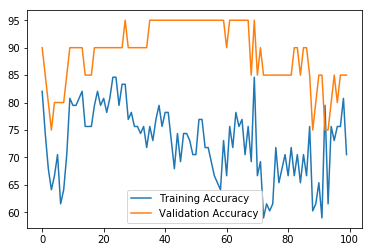

TRAIN: [ 0  1  2  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 22 23 24 25 26 27
 28 31 33 34 35 37 38 39 43 44 45 46 47 48 49 50 52 54 55 56 57 59 60 61
 62 64 65 66 67 68 70 71 72 73 74 75 76 77 78 80 82 83 84 85 86 87 88 90
 91 92 93 94 95 96 97] TEST: [ 3  4 15 21 29 30 32 36 40 41 42 51 53 58 63 69 79 81 89]
Number of training points:  (79,)
Number of testing points:  (19,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 7
epoch 1 
Best validation accuracy! iteration:7 accuracy: 84.21052631578948%
epoch 2 
Best validation accuracy! iteration:14 accuracy: 89.47368421052632%
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
ep

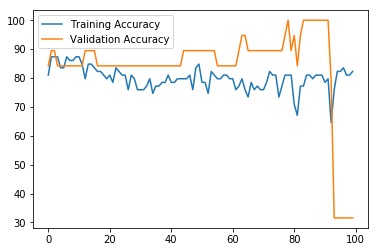

TRAIN: [ 0  1  3  4  5  6  7  8 10 11 12 13 14 15 16 17 21 22 23 26 27 28 29 30
 31 32 35 36 37 38 39 40 41 42 43 44 45 46 47 48 50 51 53 54 56 57 58 59
 60 61 62 63 64 65 66 67 69 70 71 73 74 75 76 77 78 79 81 83 84 85 87 88
 89 90 91 92 93 94 95] TEST: [ 2  9 18 19 20 24 25 33 34 49 52 55 68 72 80 82 86 96 97]
Number of training points:  (79,)
Number of testing points:  (19,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 7
epoch 1 
Best validation accuracy! iteration:7 accuracy: 73.6842105263158%
epoch 2 
Best validation accuracy! iteration:14 accuracy: 78.94736842105263%
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
epo

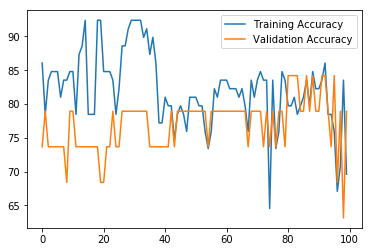

TRAIN: [ 0  1  2  3  4  5  6  8  9 10 13 14 15 16 17 18 19 20 21 24 25 27 28 29
 30 31 32 33 34 36 38 39 40 41 42 43 44 45 47 48 49 50 51 52 53 54 55 56
 58 60 61 63 64 66 68 69 71 72 73 74 75 76 78 79 80 81 82 83 84 86 88 89
 91 92 93 94 95 96 97] TEST: [ 7 11 12 22 23 26 35 37 46 57 59 62 65 67 70 77 85 87 90]
Number of training points:  (79,)
Number of testing points:  (19,)
Building Network Parameters: 
fc_units=[3000, 1000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 7
epoch 1 
Best validation accuracy! iteration:7 accuracy: 84.21052631578948%
epoch 2 
epoch 3 
Best validation accuracy! iteration:21 accuracy: 89.47368421052632%
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
epoch 21 
epoch 22 
epoch 23 
epoch 24 
epoch 25 
epoch 26 
epoch 27 
epoch 28 
epoch 29 
epoch 30 
epoch 31 
epoch 32 
epoch 33 
epoch 34 
epoch 35 
epoch 36 
ep

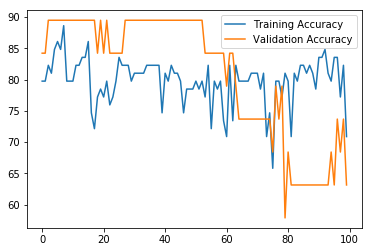

MCI_SMI average accuracy is:  90.18897243107769
MCI_SMI average standard deviation is:  5.241582367464413


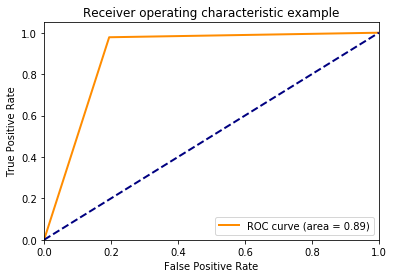

In [6]:
from sklearn.model_selection import RepeatedStratifiedKFold
from CNN_codes.CNN_with_addvariables import cnnm_training
from sklearn.metrics import roc_curve, auc

rskf=RepeatedStratifiedKFold(n_splits=5,n_repeats=5)
store_acc=[]
prediction=[]
truelabel=[]
for train_index,test_index in rskf.split(X_mcismi,y_mcismi):
    print("TRAIN:",train_index,"TEST:",test_index)
    print("Number of training points: ",train_index.shape)
    print('Number of testing points: ',test_index.shape)
    X_train,X_test=X_mcismi[train_index],X_mcismi[test_index]
    y_train,y_test=y_mcismi[train_index],y_mcismi[test_index]
    X_trainvar,X_valvar=Xvar_mcismi[train_index],Xvar_mcismi[test_index]
    tf.reset_default_graph()
    
    record_acc,recordtrainacc,recordvalacc,roc_pred,roc_truelabel=cnnm_training(X_train,y_train,X_trainvar,X_test,y_test,X_valvar,fc_units=[3000,1000,2], 
                 conv_featmap=[6,10,16],l2_norm=0.01,seed=235,
                 learning_rate=1e-3,epoch=100,batch_size=10,imglen=164,addedvar_num=100)
    
    store_acc.append(record_acc)
    prediction.extend(roc_pred)
    truelabel.extend(roc_truelabel)
    plt.plot(recordtrainacc,label='Training Accuracy')
    plt.plot(recordvalacc,label="Validation Accuracy")
    plt.legend()
    plt.show()

mean_acc=np.mean(np.array(store_acc))
mean_std=np.std(store_acc)
print('MCI_SMI average accuracy is: ',mean_acc)
print('MCI_SMI average standard deviation is: ',mean_std)

fpr,tpr,_=roc_curve(prediction,truelabel)
roc_auc=auc(fpr,tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.savefig('/Users/choyale/Desktop/Deep Learning Project/Figures/IDP_ADSMI_ROC_curve_CNNM.jpg')
plt.show()

## Run CNN with 5fold CV for AD_MCI

TRAIN: [  0   1   2   3   4   5   6   7   9  10  11  13  14  15  16  17  19  20
  21  22  24  25  26  28  29  31  32  33  34  35  36  40  41  42  43  44
  45  46  49  50  51  52  53  54  55  56  58  60  65  66  67  68  69  72
  73  74  75  76  77  78  80  81  82  83  84  87  89  90  91  92  93  94
  96  97  98  99 100 101 102 104 105 106 107 108 109 110 111 112 113 114
 115 116 117 118 119 120 121 122 123 124 125 126 128 129 130 131 133 134
 136 137 138 139 141 142 143 144 145 146 147 148 149 150 151 153 154 157
 159 160 161 163 165 166 167 168 169 170 171] TEST: [  8  12  18  23  27  30  37  38  39  47  48  57  59  61  62  63  64  70
  71  79  85  86  88  95 103 127 132 135 140 152 155 156 158 162 164]
Number of training points:  (137,)
Number of testing points:  (35,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 13
epoch 1 
Best validation accuracy! iteration:13 accuracy: 68.57142857142857%
epoch 2 
B

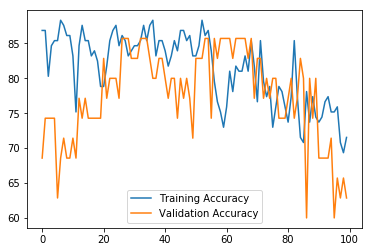

TRAIN: [  0   1   4   5   6   7   8   9  11  12  13  14  15  18  19  20  21  23
  25  26  27  29  30  31  33  34  36  37  38  39  40  41  42  43  44  45
  46  47  48  49  50  51  52  53  55  57  59  60  61  62  63  64  67  70
  71  72  74  76  77  78  79  81  82  83  85  86  87  88  89  90  91  93
  95  96  98  99 100 101 102 103 104 105 108 110 111 112 113 114 116 118
 119 120 121 122 123 124 126 127 128 130 131 132 133 134 135 137 138 139
 140 141 142 143 144 145 146 147 149 150 151 152 153 154 155 156 157 158
 159 160 161 162 163 164 166 167 168 169 171] TEST: [  2   3  10  16  17  22  24  28  32  35  54  56  58  65  66  68  69  73
  75  80  84  92  94  97 106 107 109 115 117 125 129 136 148 165 170]
Number of training points:  (137,)
Number of testing points:  (35,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 13
epoch 1 
Best validation accuracy! iteration:13 accuracy: 85.71428571428571%
epoch 2 
B

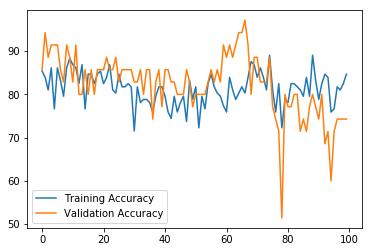

TRAIN: [  1   2   3   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19
  22  23  24  25  26  27  28  29  30  32  34  35  37  38  39  40  42  43
  47  48  49  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65
  66  67  68  69  70  71  72  73  74  75  76  78  79  80  81  83  84  85
  86  88  92  93  94  95  96  97 100 101 103 104 106 107 109 110 111 112
 113 114 115 116 117 118 119 120 121 122 125 126 127 128 129 130 131 132
 133 135 136 139 140 141 142 143 144 145 146 148 149 150 151 152 153 154
 155 156 158 159 160 161 162 163 164 165 169 170] TEST: [  0   4  20  21  31  33  36  41  44  45  46  50  77  82  87  89  90  91
  98  99 102 105 108 123 124 134 137 138 147 157 166 167 168 171]
Number of training points:  (138,)
Number of testing points:  (34,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 13
epoch 1 
Best validation accuracy! iteration:13 accuracy: 73.52941176470588%
epoch 2 
B

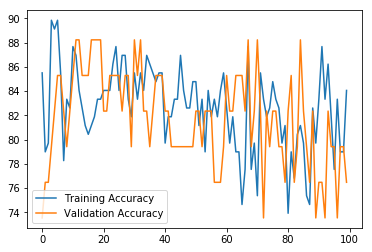

TRAIN: [  0   1   2   3   4   5   6   8   9  10  11  12  16  17  18  19  20  21
  22  23  24  27  28  29  30  31  32  33  34  35  36  37  38  39  41  42
  43  44  45  46  47  48  50  54  55  56  57  58  59  61  62  63  64  65
  66  68  69  70  71  73  75  76  77  78  79  80  81  82  84  85  86  87
  88  89  90  91  92  94  95  96  97  98  99 100 102 103 104 105 106 107
 108 109 110 113 114 115 116 117 121 123 124 125 126 127 128 129 131 132
 134 135 136 137 138 140 141 142 145 146 147 148 149 152 154 155 156 157
 158 159 161 162 164 165 166 167 168 169 170 171] TEST: [  7  13  14  15  25  26  40  49  51  52  53  60  67  72  74  83  93 101
 111 112 118 119 120 122 130 133 139 143 144 150 151 153 160 163]
Number of training points:  (138,)
Number of testing points:  (34,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 13
epoch 1 
Best validation accuracy! iteration:13 accuracy: 64.70588235294117%
epoch 2 
e

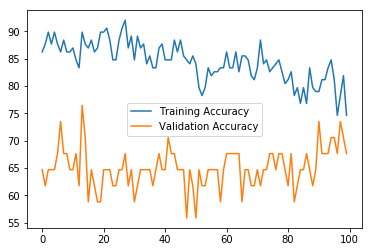

TRAIN: [  0   2   3   4   7   8  10  12  13  14  15  16  17  18  20  21  22  23
  24  25  26  27  28  30  31  32  33  35  36  37  38  39  40  41  44  45
  46  47  48  49  50  51  52  53  54  56  57  58  59  60  61  62  63  64
  65  66  67  68  69  70  71  72  73  74  75  77  79  80  82  83  84  85
  86  87  88  89  90  91  92  93  94  95  97  98  99 101 102 103 105 106
 107 108 109 111 112 115 117 118 119 120 122 123 124 125 127 129 130 132
 133 134 135 136 137 138 139 140 143 144 147 148 150 151 152 153 155 156
 157 158 160 162 163 164 165 166 167 168 170 171] TEST: [  1   5   6   9  11  19  29  34  42  43  55  76  78  81  96 100 104 110
 113 114 116 121 126 128 131 141 142 145 146 149 154 159 161 169]
Number of training points:  (138,)
Number of testing points:  (34,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 13
epoch 1 
Best validation accuracy! iteration:13 accuracy: 73.52941176470588%
epoch 2 
B

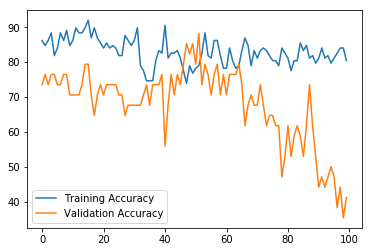

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  14  16  17  18  19
  21  22  23  24  25  26  27  28  29  30  31  32  33  35  36  38  39  40
  41  42  43  45  46  47  48  49  50  51  52  53  54  55  56  60  61  64
  65  66  67  69  70  71  75  76  77  78  79  80  82  83  85  86  87  89
  90  91  93  94  95  96  97 101 102 103 104 105 107 108 110 111 112 113
 114 115 118 120 121 122 123 124 125 126 130 131 132 133 134 137 138 139
 140 141 143 144 146 147 148 149 150 151 152 153 154 155 156 157 158 159
 160 161 162 163 164 165 167 168 169 170 171] TEST: [ 13  15  20  34  37  44  57  58  59  62  63  68  72  73  74  81  84  88
  92  98  99 100 106 109 116 117 119 127 128 129 135 136 142 145 166]
Number of training points:  (137,)
Number of testing points:  (35,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 13
epoch 1 
Best validation accuracy! iteration:13 accuracy: 80.0%
epoch 2 
Best validatio

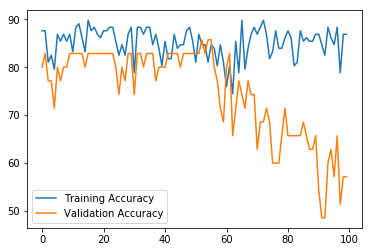

TRAIN: [  1   2   3   4   5   6   7   8  10  12  13  14  15  17  18  19  20  22
  24  25  27  28  29  30  31  32  33  34  35  37  40  41  43  44  45  46
  47  48  49  51  53  54  55  56  57  58  59  61  62  63  64  65  66  67
  68  70  71  72  73  74  75  77  79  80  81  84  85  86  88  89  90  92
  93  94  96  97  98  99 100 102 103 104 105 106 107 108 109 110 113 114
 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132
 135 136 137 138 139 140 141 142 143 144 145 146 147 148 150 151 152 153
 155 157 158 159 161 162 164 166 168 170 171] TEST: [  0   9  11  16  21  23  26  36  38  39  42  50  52  60  69  76  78  82
  83  87  91  95 101 111 112 133 134 149 154 156 160 163 165 167 169]
Number of training points:  (137,)
Number of testing points:  (35,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 13
epoch 1 
Best validation accuracy! iteration:13 accuracy: 80.0%
epoch 2 
epoch 3 
epoch

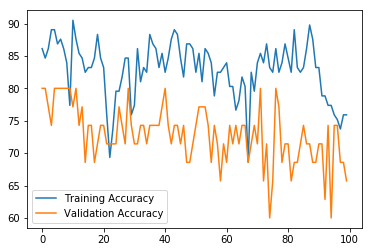

TRAIN: [  0   1   2   3   5   8   9  10  11  12  13  14  15  16  18  19  20  21
  22  23  24  26  27  31  32  33  34  35  36  37  38  39  40  42  44  45
  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  62  63  64
  66  68  69  71  72  73  74  76  78  79  81  82  83  84  85  87  88  91
  92  93  94  95  97  98  99 100 101 102 104 105 106 107 108 109 110 111
 112 113 114 116 117 119 120 121 123 124 126 127 128 129 130 133 134 135
 136 138 139 140 141 142 144 145 146 147 148 149 150 151 153 154 155 156
 157 160 161 162 163 164 165 166 167 169 170 171] TEST: [  4   6   7  17  25  28  29  30  41  43  61  65  67  70  75  77  80  86
  89  90  96 103 115 118 122 125 131 132 137 143 152 158 159 168]
Number of training points:  (138,)
Number of testing points:  (34,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 13
epoch 1 
Best validation accuracy! iteration:13 accuracy: 67.64705882352942%
epoch 2 
e

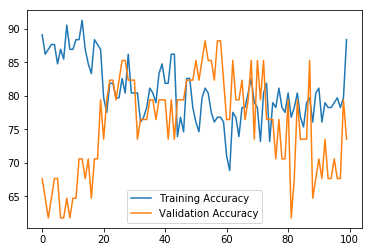

TRAIN: [  0   4   6   7   9  11  12  13  14  15  16  17  18  20  21  23  24  25
  26  27  28  29  30  31  34  36  37  38  39  41  42  43  44  45  46  48
  49  50  52  53  54  55  56  57  58  59  60  61  62  63  65  67  68  69
  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87
  88  89  90  91  92  93  95  96  97  98  99 100 101 103 104 105 106 107
 108 109 111 112 114 115 116 117 118 119 121 122 124 125 127 128 129 131
 132 133 134 135 136 137 139 142 143 144 145 147 149 150 151 152 153 154
 156 157 158 159 160 162 163 165 166 167 168 169] TEST: [  1   2   3   5   8  10  19  22  32  33  35  40  47  51  64  66  94 102
 110 113 120 123 126 130 138 140 141 146 148 155 161 164 170 171]
Number of training points:  (138,)
Number of testing points:  (34,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 13
epoch 1 
Best validation accuracy! iteration:13 accuracy: 70.58823529411765%
epoch 2 
e

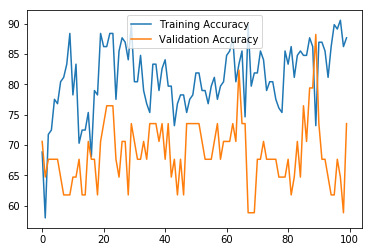

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  13  15  16  17  19  20
  21  22  23  25  26  28  29  30  32  33  34  35  36  37  38  39  40  41
  42  43  44  47  50  51  52  57  58  59  60  61  62  63  64  65  66  67
  68  69  70  72  73  74  75  76  77  78  80  81  82  83  84  86  87  88
  89  90  91  92  94  95  96  98  99 100 101 102 103 106 109 110 111 112
 113 115 116 117 118 119 120 122 123 125 126 127 128 129 130 131 132 133
 134 135 136 137 138 140 141 142 143 145 146 148 149 152 154 155 156 158
 159 160 161 163 164 165 166 167 168 169 170 171] TEST: [ 12  14  18  24  27  31  45  46  48  49  53  54  55  56  71  79  85  93
  97 104 105 107 108 114 121 124 139 144 147 150 151 153 157 162]
Number of training points:  (138,)
Number of testing points:  (34,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 13
epoch 1 
Best validation accuracy! iteration:13 accuracy: 73.52941176470588%
epoch 2 
B

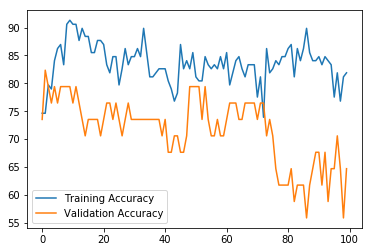

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  15  16  17  18
  20  22  24  25  26  27  28  31  32  33  34  37  38  39  40  42  43  44
  46  47  48  51  52  53  55  57  58  59  60  61  63  64  65  66  67  68
  69  70  71  72  74  75  76  77  78  79  80  81  82  83  86  87  88  89
  90  91  92  93  94  95  96  98  99 101 102 103 104 105 106 107 108 110
 111 112 113 114 117 118 119 120 121 125 126 127 128 129 130 133 135 136
 137 138 139 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155
 156 158 159 161 162 163 164 168 169 170 171] TEST: [ 14  19  21  23  29  30  35  36  41  45  49  50  54  56  62  73  84  85
  97 100 109 115 116 122 123 124 131 132 134 140 157 160 165 166 167]
Number of training points:  (137,)
Number of testing points:  (35,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 13
epoch 1 
Best validation accuracy! iteration:13 accuracy: 91.42857142857143%
epoch 2 
e

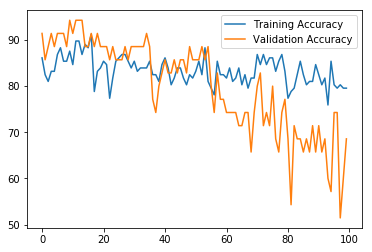

TRAIN: [  1   2   3   5   6   7   8   9  10  11  12  13  14  15  16  18  19  20
  21  22  23  24  25  26  27  29  30  32  34  35  36  39  40  41  42  43
  44  45  47  48  49  50  52  53  54  55  56  57  59  60  62  64  65  66
  67  68  69  70  71  73  74  75  76  77  79  80  81  82  83  84  85  87
  88  89  90  92  94  95  96  97  98  99 100 101 102 103 105 106 108 109
 110 111 112 114 115 116 117 118 122 123 124 125 126 127 128 129 130 131
 132 133 134 135 137 138 140 141 142 143 146 147 148 151 154 155 156 157
 158 159 160 161 162 163 164 165 166 167 170] TEST: [  0   4  17  28  31  33  37  38  46  51  58  61  63  72  78  86  91  93
 104 107 113 119 120 121 136 139 144 145 149 150 152 153 168 169 171]
Number of training points:  (137,)
Number of testing points:  (35,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 13
epoch 1 
Best validation accuracy! iteration:13 accuracy: 40.0%
epoch 2 
Best validatio

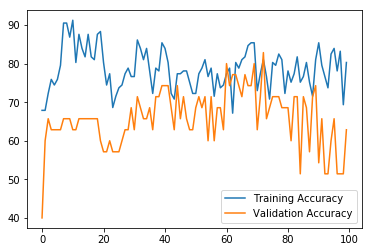

TRAIN: [  0   1   2   4   7   9  11  12  13  14  15  17  18  19  20  21  22  23
  26  27  28  29  30  31  32  33  34  35  36  37  38  40  41  42  45  46
  47  49  50  51  52  53  54  55  56  57  58  60  61  62  63  65  67  68
  69  70  71  72  73  74  75  76  78  81  82  83  84  85  86  87  90  91
  92  93  94  95  96  97  98  99 100 101 103 104 105 106 107 108 109 111
 112 113 115 116 118 119 120 121 122 123 124 125 126 127 130 131 132 133
 134 135 136 139 140 142 144 145 146 147 148 149 150 151 152 153 154 155
 157 159 160 162 163 165 166 167 168 169 170 171] TEST: [  3   5   6   8  10  16  24  25  39  43  44  48  59  64  66  77  79  80
  88  89 102 110 114 117 128 129 137 138 141 143 156 158 161 164]
Number of training points:  (138,)
Number of testing points:  (34,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 13
epoch 1 
Best validation accuracy! iteration:13 accuracy: 82.35294117647058%
epoch 2 
e

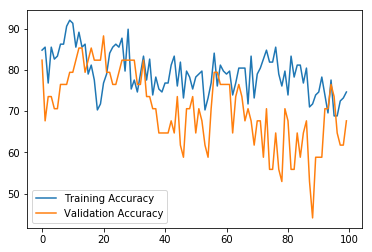

TRAIN: [  0   1   3   4   5   6   8  10  14  16  17  18  19  20  21  23  24  25
  26  28  29  30  31  32  33  34  35  36  37  38  39  41  42  43  44  45
  46  47  48  49  50  51  52  53  54  56  57  58  59  60  61  62  63  64
  66  67  68  69  72  73  75  77  78  79  80  82  84  85  86  88  89  91
  92  93  94  96  97  98 100 102 104 107 108 109 110 113 114 115 116 117
 118 119 120 121 122 123 124 125 127 128 129 130 131 132 133 134 135 136
 137 138 139 140 141 142 143 144 145 147 149 150 152 153 156 157 158 159
 160 161 162 163 164 165 166 167 168 169 170 171] TEST: [  2   7   9  11  12  13  15  22  27  40  55  65  70  71  74  76  81  83
  87  90  95  99 101 103 105 106 111 112 126 146 148 151 154 155]
Number of training points:  (138,)
Number of testing points:  (34,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 13
epoch 1 
Best validation accuracy! iteration:13 accuracy: 58.8235294117647%
epoch 2 
ep

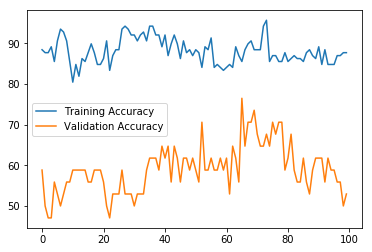

TRAIN: [  0   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  19
  21  22  23  24  25  27  28  29  30  31  33  35  36  37  38  39  40  41
  43  44  45  46  48  49  50  51  54  55  56  58  59  61  62  63  64  65
  66  70  71  72  73  74  76  77  78  79  80  81  83  84  85  86  87  88
  89  90  91  93  95  97  99 100 101 102 103 104 105 106 107 109 110 111
 112 113 114 115 116 117 119 120 121 122 123 124 126 128 129 131 132 134
 136 137 138 139 140 141 143 144 145 146 148 149 150 151 152 153 154 155
 156 157 158 160 161 164 165 166 167 168 169 171] TEST: [  1  18  20  26  32  34  42  47  52  53  57  60  67  68  69  75  82  92
  94  96  98 108 118 125 127 130 133 135 142 147 159 162 163 170]
Number of training points:  (138,)
Number of testing points:  (34,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 13
epoch 1 
Best validation accuracy! iteration:13 accuracy: 73.52941176470588%
epoch 2 
B

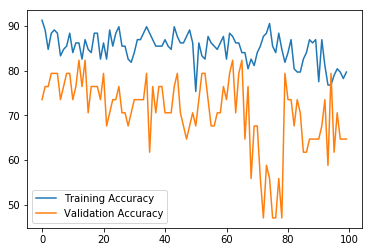

TRAIN: [  0   1   2   3   6   7   8   9  10  11  13  14  15  16  17  18  19  20
  21  22  23  24  25  26  28  29  30  31  32  34  35  37  38  43  44  46
  47  49  51  52  53  54  55  56  57  59  60  61  62  64  65  66  67  68
  69  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106
 107 108 109 110 111 112 113 114 115 116 117 118 120 122 123 124 125 126
 128 130 131 135 136 137 139 140 141 142 144 147 148 149 150 151 152 153
 157 158 160 161 162 164 166 167 168 169 171] TEST: [  4   5  12  27  33  36  39  40  41  42  45  48  50  58  63  70  71 119
 121 127 129 132 133 134 138 143 145 146 154 155 156 159 163 165 170]
Number of training points:  (137,)
Number of testing points:  (35,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 13
epoch 1 
Best validation accuracy! iteration:13 accuracy: 68.57142857142857%
epoch 2 
e

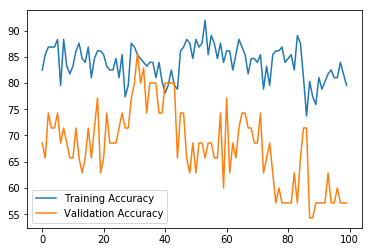

TRAIN: [  1   2   3   4   5   6   7   9  10  12  13  15  16  17  18  19  20  21
  24  26  27  28  30  31  32  33  36  37  38  39  40  41  42  44  45  46
  47  48  49  50  52  53  55  57  58  59  60  61  62  63  64  65  66  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  84  85  86
  87  88  89  90  91  92  93  95  96  97  98  99 101 103 104 105 106 107
 109 112 113 116 117 119 120 121 122 123 124 126 127 128 129 130 131 132
 133 134 135 138 139 140 142 143 144 145 146 150 151 152 153 154 155 156
 157 159 160 161 162 163 164 165 167 170 171] TEST: [  0   8  11  14  22  23  25  29  34  35  43  51  54  56  83  94 100 102
 108 110 111 114 115 118 125 136 137 141 147 148 149 158 166 168 169]
Number of training points:  (137,)
Number of testing points:  (35,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 13
epoch 1 
Best validation accuracy! iteration:13 accuracy: 82.85714285714286%
epoch 2 
e

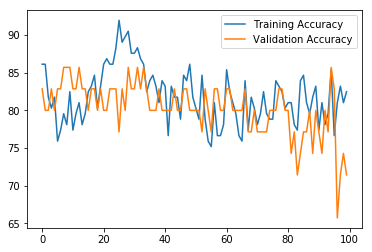

TRAIN: [  0   1   2   4   5   8   9  11  12  14  15  20  21  22  23  24  25  26
  27  29  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48
  49  50  51  52  54  55  56  58  60  61  62  63  64  66  67  68  70  71
  72  74  75  77  78  79  80  81  82  83  86  88  89  90  91  94  95  96
  97  98  99 100 101 102 103 104 106 107 108 109 110 111 112 113 114 115
 117 118 119 120 121 122 123 124 125 127 129 130 131 132 133 134 135 136
 137 138 139 140 141 142 143 144 145 146 147 148 149 151 152 153 154 155
 156 157 158 159 162 163 165 166 167 168 169 170] TEST: [  3   6   7  10  13  16  17  18  19  28  30  31  32  53  57  59  65  69
  73  76  84  85  87  92  93 105 116 126 128 150 160 161 164 171]
Number of training points:  (138,)
Number of testing points:  (34,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 13
epoch 1 
Best validation accuracy! iteration:13 accuracy: 76.47058823529412%
epoch 2 
e

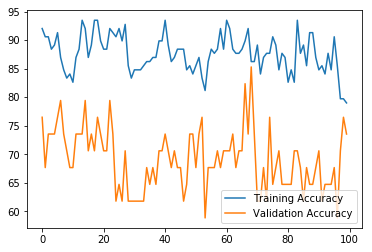

TRAIN: [  0   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  27  28  29  30  31  32  33  34  35  36  37
  38  39  40  41  42  43  45  46  47  48  50  51  52  53  54  56  57  58
  59  60  63  65  69  70  71  73  74  76  77  78  79  80  82  83  84  85
  87  89  90  92  93  94  95 100 102 105 106 107 108 109 110 111 112 114
 115 116 117 118 119 120 121 124 125 126 127 128 129 131 132 133 134 136
 137 138 141 143 144 145 146 147 148 149 150 151 153 154 155 156 157 158
 159 160 161 163 164 165 166 167 168 169 170 171] TEST: [  1  26  44  49  55  61  62  64  66  67  68  72  75  81  86  88  91  96
  97  98  99 101 103 104 113 122 123 130 135 139 140 142 152 162]
Number of training points:  (138,)
Number of testing points:  (34,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 13
epoch 1 
Best validation accuracy! iteration:13 accuracy: 76.47058823529412%
epoch 2 
e

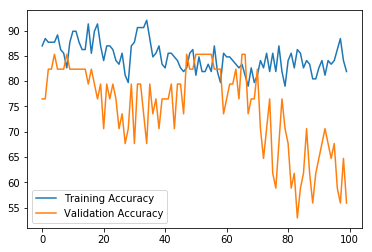

TRAIN: [  0   1   3   4   5   6   7   8  10  11  12  13  14  16  17  18  19  22
  23  25  26  27  28  29  30  31  32  33  34  35  36  39  40  41  42  43
  44  45  48  49  50  51  53  54  55  56  57  58  59  61  62  63  64  65
  66  67  68  69  70  71  72  73  75  76  81  83  84  85  86  87  88  91
  92  93  94  96  97  98  99 100 101 102 103 104 105 108 110 111 113 114
 115 116 118 119 121 122 123 125 126 127 128 129 130 132 133 134 135 136
 137 138 139 140 141 142 143 145 146 147 148 149 150 152 154 155 156 158
 159 160 161 162 163 164 165 166 168 169 170 171] TEST: [  2   9  15  20  21  24  37  38  46  47  52  60  74  77  78  79  80  82
  89  90  95 106 107 109 112 117 120 124 131 144 151 153 157 167]
Number of training points:  (138,)
Number of testing points:  (34,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 13
epoch 1 
Best validation accuracy! iteration:13 accuracy: 76.47058823529412%
epoch 2 
e

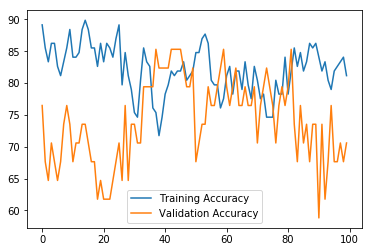

TRAIN: [  4   5   6   7   9  10  11  12  13  14  15  16  17  19  20  21  22  24
  25  26  27  29  31  32  33  35  36  37  38  41  43  44  45  46  49  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  66  67  68  70
  71  72  73  74  75  76  78  79  80  82  83  84  85  86  87  89  90  91
  92  94  95  96  97  99 100 101 102 103 104 105 106 107 108 109 110 111
 112 113 114 115 116 117 119 120 122 123 125 126 127 128 129 133 134 135
 136 138 139 140 141 142 143 144 145 146 148 149 150 151 152 154 155 156
 157 158 160 161 162 163 164 165 167 168 170] TEST: [  0   1   2   3   8  18  23  28  30  34  39  40  42  47  48  65  69  77
  81  88  93  98 118 121 124 130 131 132 137 147 153 159 166 169 171]
Number of training points:  (137,)
Number of testing points:  (35,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 13
epoch 1 
Best validation accuracy! iteration:13 accuracy: 80.0%
epoch 2 
Best validatio

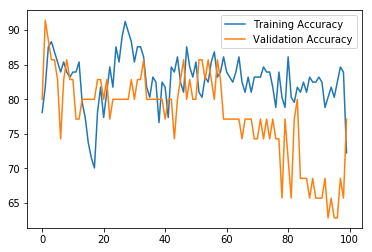

TRAIN: [  0   1   2   3   5   7   8   9  11  12  13  15  16  17  18  19  20  21
  22  23  24  25  26  28  29  30  31  33  34  35  36  37  38  39  40  41
  42  43  45  46  47  48  49  50  52  53  54  55  58  59  63  64  65  67
  69  70  71  72  73  74  75  76  77  78  80  81  82  83  84  85  86  87
  88  89  90  91  93  94  95  96  97  98 102 103 105 107 108 109 110 111
 112 114 115 117 118 120 121 122 124 125 126 127 128 129 130 131 132 133
 134 135 136 137 138 139 140 141 143 144 147 148 150 151 152 153 155 157
 158 159 160 163 164 165 166 168 169 170 171] TEST: [  4   6  10  14  27  32  44  51  56  57  60  61  62  66  68  79  92  99
 100 101 104 106 113 116 119 123 142 145 146 149 154 156 161 162 167]
Number of training points:  (137,)
Number of testing points:  (35,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 13
epoch 1 
Best validation accuracy! iteration:13 accuracy: 85.71428571428571%
epoch 2 
B

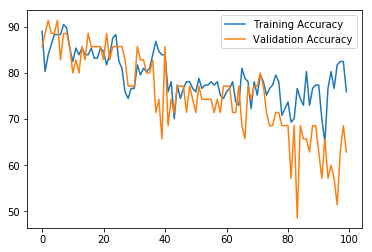

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  18  19  20
  21  22  23  24  25  26  27  28  29  30  31  32  34  35  39  40  41  42
  44  45  46  47  48  49  50  51  53  54  56  57  59  60  61  62  63  65
  66  67  68  69  72  76  77  78  79  80  81  82  83  84  85  86  87  88
  92  93  94  95  96  98  99 100 101 102 103 104 105 106 107 108 110 112
 113 116 118 119 120 121 123 124 125 126 127 128 129 130 131 132 133 135
 136 137 138 139 140 141 142 145 146 147 148 149 150 153 154 155 156 157
 158 159 160 161 162 164 165 166 167 168 169 171] TEST: [ 15  16  17  33  36  37  38  43  52  55  58  64  70  71  73  74  75  89
  90  91  97 109 111 114 115 117 122 134 143 144 151 152 163 170]
Number of training points:  (138,)
Number of testing points:  (34,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 13
epoch 1 
Best validation accuracy! iteration:13 accuracy: 70.58823529411765%
epoch 2 
e

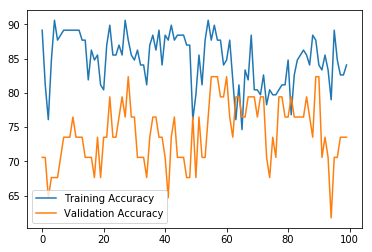

TRAIN: [  0   1   2   3   4   6   7   8  10  13  14  15  16  17  18  19  21  23
  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  42  43
  44  45  46  47  48  49  51  52  53  55  56  57  58  59  60  61  62  63
  64  65  66  67  68  69  70  71  72  73  74  75  77  79  80  81  83  84
  85  86  88  89  90  91  92  93  97  98  99 100 101 103 104 105 106 109
 110 111 113 114 115 116 117 118 119 120 121 122 123 124 127 128 129 130
 131 132 133 134 137 139 142 143 144 145 146 147 149 151 152 153 154 156
 157 159 160 161 162 163 165 166 167 169 170 171] TEST: [  5   9  11  12  20  22  24  41  50  54  76  78  82  87  94  95  96 102
 107 108 112 125 126 135 136 138 140 141 148 150 155 158 164 168]
Number of training points:  (138,)
Number of testing points:  (34,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 13
epoch 1 
Best validation accuracy! iteration:13 accuracy: 61.76470588235294%
epoch 2 
B

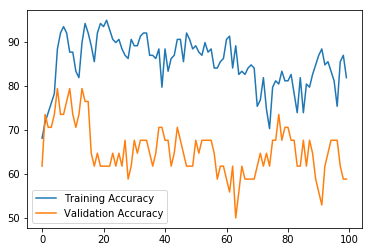

TRAIN: [  0   1   2   3   4   5   6   8   9  10  11  12  14  15  16  17  18  20
  22  23  24  27  28  30  32  33  34  36  37  38  39  40  41  42  43  44
  47  48  50  51  52  54  55  56  57  58  60  61  62  64  65  66  68  69
  70  71  73  74  75  76  77  78  79  81  82  87  88  89  90  91  92  93
  94  95  96  97  98  99 100 101 102 104 106 107 108 109 111 112 113 114
 115 116 117 118 119 121 122 123 124 125 126 130 131 132 134 135 136 137
 138 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156
 158 159 161 162 163 164 166 167 168 169 170 171] TEST: [  7  13  19  21  25  26  29  31  35  45  46  49  53  59  63  67  72  80
  83  84  85  86 103 105 110 120 127 128 129 133 139 157 160 165]
Number of training points:  (138,)
Number of testing points:  (34,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 13
epoch 1 
Best validation accuracy! iteration:13 accuracy: 58.8235294117647%
epoch 2 
Be

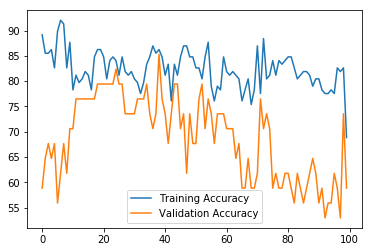

AD_MCI average accuracy is:  85.6705882352941
AD_MCI average standard deviation is:  4.846233568833243


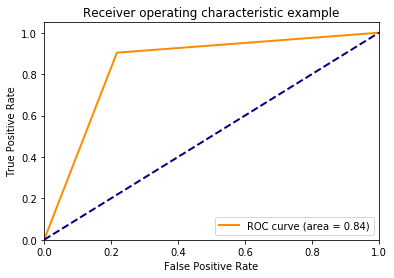

In [8]:
from sklearn.model_selection import RepeatedStratifiedKFold
from CNN_codes.CNN_with_addvariables import cnnm_training
from sklearn.metrics import roc_curve, auc

rskf=RepeatedStratifiedKFold(n_splits=5,n_repeats=5)
store_acc=[]
prediction=[]
truelabel=[]
for train_index,test_index in rskf.split(X_admci,y_admci):
    print("TRAIN:",train_index,"TEST:",test_index)
    print("Number of training points: ",train_index.shape)
    print('Number of testing points: ',test_index.shape)
    X_train,X_test=X_admci[train_index],X_admci[test_index]
    y_train,y_test=y_admci[train_index],y_admci[test_index]
    X_trainvar,X_valvar=Xvar_admci[train_index],Xvar_admci[test_index]
    tf.reset_default_graph()
    
    record_acc,recordtrainacc,recordvalacc,roc_pred,roc_truelabel=cnnm_training(X_train,y_train,X_trainvar,X_test,y_test,X_valvar,fc_units=[4000,2000,2], 
                 conv_featmap=[6,10,16],l2_norm=0.01,seed=235,
                 learning_rate=1e-3,epoch=100,batch_size=10,imglen=164,addedvar_num=100)
    
    store_acc.append(record_acc)
    prediction.extend(roc_pred)
    truelabel.extend(roc_truelabel)
    plt.plot(recordtrainacc,label='Training Accuracy')
    plt.plot(recordvalacc,label="Validation Accuracy")
    plt.legend()
    plt.show()

mean_acc=np.mean(np.array(store_acc))
mean_std=np.std(store_acc)
print('AD_MCI average accuracy is: ',mean_acc)
print('AD_MCI average standard deviation is: ',mean_std)

fpr,tpr,_=roc_curve(prediction,truelabel)
roc_auc=auc(fpr,tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.savefig('/Users/choyale/Desktop/Deep Learning Project/Figures/IDP_ADMCI_ROC_curve_CNNM.jpg')
plt.show()

## Run CNN on all data, 5 fold CV for 3-label classification

In [9]:
y=data[:,1]

from sklearn.model_selection import RepeatedStratifiedKFold
from CNN_codes.CNN_with_addvariables import cnnm_training
from sklearn.metrics import roc_curve, auc

rskf=RepeatedStratifiedKFold(n_splits=5,n_repeats=2)
store_acc=[]
prediction=[]
truelabel=[]
for train_index,test_index in rskf.split(X,y):
    print("TRAIN:",train_index,"TEST:",test_index)
    print("Number of training points: ",train_index.shape)
    print('Number of testing points: ',test_index.shape)
    X_train,X_test=X[train_index],X[test_index]
    y_train,y_test=y[train_index],y[test_index]
    X_trainvar,X_valvar=morphdata[train_index],morphdata[test_index]
    tf.reset_default_graph()
    
    record_acc,recordtrainacc,recordvalacc,roc_pred,roc_truelabel=cnnm_training(X_train,y_train,X_trainvar,X_test,y_test,X_valvar,fc_units=[4000,2000,2], 
                 conv_featmap=[6,10,16],l2_norm=0.01,seed=235,
                 learning_rate=1e-3,epoch=100,batch_size=10,imglen=164,addedvar_num=100)
    
    store_acc.append(record_acc)
    prediction.extend(roc_pred)
    truelabel.extend(roc_truelabel)
    plt.plot(recordtrainacc,label='Training Accuracy')
    plt.plot(recordvalacc,label="Validation Accuracy")
    plt.legend()
    plt.show()

mean_acc=np.mean(np.array(store_acc))
mean_std=np.std(store_acc)
print('ALL average accuracy is: ',mean_acc)
print('ALL average standard deviation is: ',mean_std)

fpr,tpr,_=roc_curve(prediction,truelabel)
roc_auc=auc(fpr,tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.savefig('/Users/choyale/Desktop/Deep Learning Project/Figures/IDP_3class_CNNM.jpg')
plt.show()


TRAIN: [  0   1   2   3   4   5   6   7   9  10  11  13  15  16  17  18  19  20
  21  22  23  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39
  40  41  42  43  44  45  46  48  49  50  53  55  58  59  60  61  62  63
  65  66  67  69  70  71  72  73  74  75  76  77  78  79  80  82  83  84
  85  86  87  89  90  92  94  97  99 100 101 102 103 104 106 108 109 111
 112 114 116 117 118 119 120 121 123 126 127 128 129 130 131 132 133 134
 135 137 138 139 140 141 142 143 144 145 147 149 150 151 152 153 154 155
 156 157 159 160 161 162 164 165 166 167 168 169 170 171 172 174 176 177
 178 180 182 183 184 186 187 188 189 190 191 192 193 195 196 198 199 200
 202 203 207] TEST: [  8  12  14  24  47  51  52  54  56  57  64  68  81  88  91  93  95  96
  98 105 107 110 113 115 122 124 125 136 146 148 158 163 173 175 179 181
 185 194 197 201 204 205 206]
Number of training points:  (165,)
Number of testing points:  (43,)
Building Network Parameters: 
fc_units=[4000, 2000, 2]
l2_norm=0.01
seed

KeyboardInterrupt: 